In [1]:
%env DATA_ROOT /atmacup/atmacup11/data

env: DATA_ROOT=/atmacup/atmacup11/data


In [2]:
pwd

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup'

In [3]:
cd ${DATA_ROOT}

[WinError 2] 指定されたファイルが見つかりません。: '${DATA_ROOT}'
C:\Users\zaxir\Documents\my_pj\learn\atmacup


In [4]:
pwd

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup'

In [5]:
pwd


'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup'

In [6]:
import os

import pandas as pd
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install python-vivid

In [8]:
dataset_root = os.path.join(os.path.expanduser("~"),"Documents\\my_pj\\learn\\atmacup\\atmacup11\\data")

In [9]:
print(dataset_root)

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data


In [10]:
input_dir = os.path.join(dataset_root,"inputs")
photo_dir = os.path.join(input_dir,"photos\\photos")
output_dir = os.path.join(dataset_root,"outputs_tutorial#1")
print(input_dir)
print(photo_dir)

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data\inputs
C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data\inputs\photos\photos


In [11]:
os.makedirs(output_dir,exist_ok=True)

In [12]:
photo_pathes = glob(os.path.join(photo_dir,"*.jpg"))

In [13]:
glob(dataset_root + '/inputs/*')

['C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\atmaCup#11_sample_submission.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\materials.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\photos',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\techniques.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\test.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\train.csv']

In [14]:
dataset_root

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data'

In [15]:
input_dir

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data\\inputs'

In [20]:
cd ./atmacup11/data

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data


In [21]:
train_df = pd.read_csv('./inputs/train.csv')
test_df = pd.read_csv('./inputs/test.csv')

material_df = pd.read_csv('./inputs/materials.csv')
technique_df = pd.read_csv('./inputs/techniques.csv')

In [22]:
from matplotlib_venn import venn2

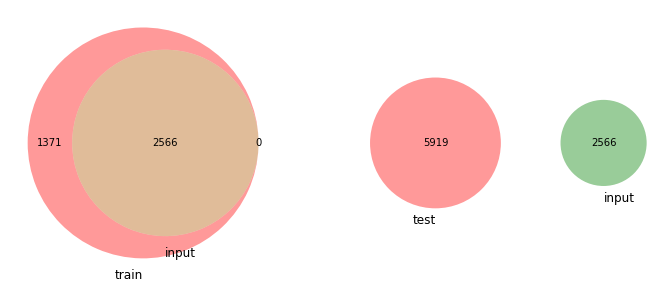

In [23]:
input_df = technique_df

fig,axes = plt.subplots(figsize=(12,5),ncols=2)

venn2(subsets=(
    set(train_df['object_id']),set(input_df['object_id'])
),set_labels=('train','input'),ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']),set(input_df['object_id'])
),set_labels=('test','input'),ax=axes[1])


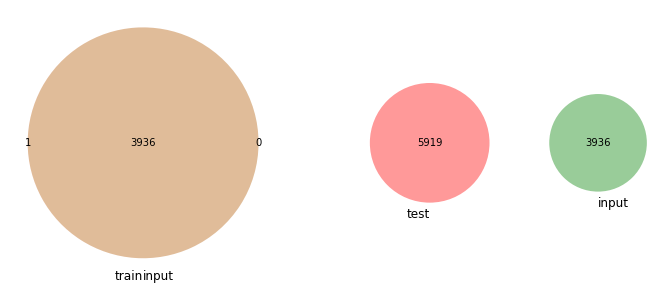

In [24]:
# materialの場合
input_df = material_df

fig,axes = plt.subplots(figsize=(12,5),ncols=2)

venn2(subsets=(
    set(train_df['object_id']),set(input_df['object_id'])
),set_labels=('train','input'),ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']),set(input_df['object_id'])
),set_labels=('test','input'),ax=axes[1])

In [25]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


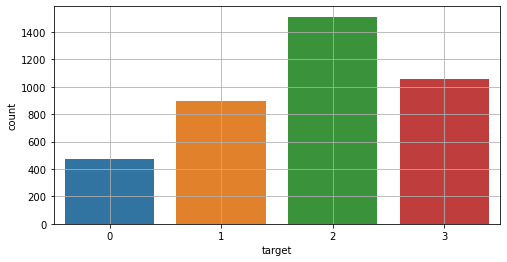

In [26]:
fig,ax=plt.subplots(figsize=(8,4))
sns.countplot(data=train_df,x='target',ax=ax)
ax.grid()

In [27]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

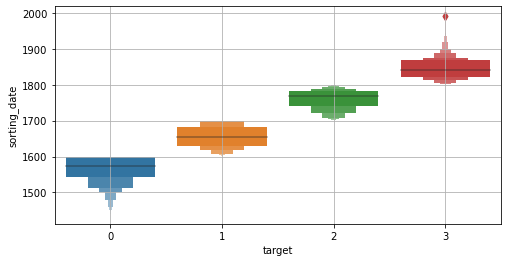

In [28]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxenplot(data=train_df,x='target',y='sorting_date',ax=ax)
ax.grid()

In [29]:
train_df.groupby('target')['sorting_date'].agg(['min','max','median','size'])

,min,max,median,size
target,,,,
0,1440,1600,1574,475
1,1601,1700,1655,896
2,1701,1800,1770,1511
3,1801,1991,1841,1055


In [30]:
test_df.head()

,object_id
0,0009e50b94be36ccad39
1,000bd5e82eb22f199f44
2,0015f44de1854f617516
3,00388a678879ba1efa27
4,005e1e7c6496902d23f3


In [31]:
from PIL import Image

def to_img_path(object_id):
    return os.path.join(photo_dir,f'{object_id}.jpg')

def read_image(object_id):
    return Image.open(to_img_path(object_id))

In [32]:
img = read_image(train_df['object_id'].iat[0])

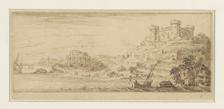

In [33]:
img

In [34]:
from torchvision import transforms as T

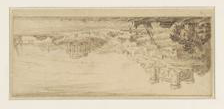

In [35]:
T.RandomVerticalFlip(p=1)(img)

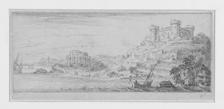

In [36]:
T.RandomGrayscale(1)(img)

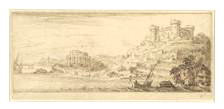

In [37]:
T.ColorJitter(brightness=.3, contrast=.5, saturation=[.8, 1.3])(img)

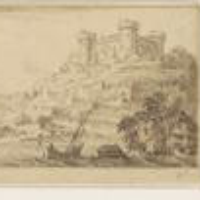

In [38]:
T.RandomResizedCrop(size=(200, 200), )(img)

In [39]:
import torch
from torchvision.models import resnet34
from torch import nn

In [40]:
model = resnet34(pretrained=False)

In [41]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
converter = T.Compose([
    T.RandomVerticalFlip(p=1),
    T.ColorJitter(brightness=.5,contrast=.5),
    T.ToTensor()
])

In [43]:
x = converter(img)

In [44]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [45]:
torch.Tensor

torch.Tensor

In [46]:
x.shape

torch.Size([3, 109, 224])

In [47]:
x.unsqueeze(0).shape

torch.Size([1, 3, 109, 224])

In [48]:
torch.Size([1,3,109,224])

torch.Size([1, 3, 109, 224])

In [49]:
output = model(x.unsqueeze(0))

C:\Users\zaxir\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [50]:
torch.Size([1,1000])

torch.Size([1, 1000])

In [51]:
model.fc = nn.Linear(in_features=512,out_features=1,bias=True)

In [52]:
model(x.unsqueeze(0))

tensor([[0.7692]], grad_fn=<AddmmBackward>)

In [53]:
criterion = nn.MSELoss()

In [54]:
(3-10)**2

49

In [55]:
criterion(torch.Tensor([3]),torch.Tensor([10]))

tensor(49.)

In [56]:
from torch.optim import Adam
optimizer = Adam(params=model.parameters(),lr=1e-3)

In [57]:
x = converter(img)
x = x.unsqueeze(0)

label = train_df['target'].iat[0]
label = torch.Tensor([label])
label = label.reshape(-1,1)

output = model(x)
loss = criterion(output,label)

optimizer.zero_grad()

loss.backward()

optimizer.step()

print(loss.item())

0.04852309077978134


In [58]:
from torch.utils import data

IMG_MEAN = [0.485,0.456,0.406]
IMG_STD = [0.229,0.224,0.224]

class AtmaDataset(data.Dataset):
    object_path_key = "object_path"
    label_key = "target"
    
    @property
    def meta_keys(self):
        retval = [self.object_path_key]
        
        if self.is_train:
            retval += [self.label_key]
            
        return retval
    
    def __init__(self,meta_df:pd.DataFrame,is_train=True):
        """
        args:
            meta_df: 
                画像へのパスと label 情報が含まれている dataframe
                必ず object_path に画像へのパス, target に正解ラベルが入っている必要があります

            is_train:
                True のとき学習用のデータ拡張を適用します.
                False の時は単に size にリサイズを行います
        """

        self.is_train = is_train
        for k in self.meta_keys:
            if k not in meta_df:
                raise ValueError("meta df must have {}".format(k))

        self.meta_df = meta_df.reset_index(drop=True)
        self.index_to_data = self.meta_df.to_dict(orient="index")

        size = (224, 224)

        additional_items = (
            [T.Resize(size)]
            if not is_train
            else [
                T.RandomGrayscale(p=0.2),
                T.RandomVerticalFlip(),
                T.RandomHorizontalFlip(),
                T.ColorJitter(
                    brightness=0.3,
                    contrast=0.5,
                    saturation=[0.8, 1.3],
                    hue=[-0.05, 0.05],
                ),
                T.RandomResizedCrop(size),
            ]
        )

        self.transformer = T.Compose(
            [*additional_items, T.ToTensor(), T.Normalize(mean=IMG_MEAN, std=IMG_STD)]
        )

    def __getitem__(self, index):
        data = self.index_to_data[index]

        obj_path, label = data.get(self.object_path_key), data.get(self.label_key, -1)
        img = Image.open(obj_path)
        img = self.transformer(img)
        return img, label

    def __len__(self):
        return len(self.meta_df)

In [59]:
train_meta_df = train_df[['target', 'object_id']].copy()
train_meta_df['object_path'] = train_meta_df['object_id'].map(to_img_path)

dataset = AtmaDataset(meta_df=train_meta_df)

In [60]:
# この場合同時に 54 個の画像に対応した tensor と label が作られる
loader = data.DataLoader(dataset=dataset, batch_size=54, num_workers=4)

In [61]:
assert torch.cuda.is_available()

DEVICE = torch.device("cuda")

In [62]:
from torch.optim.optimizer import Optimizer
from collections import defaultdict

def train(
    model: nn.Module,
    optimizer: Optimizer,
    train_loader: data.DataLoader
) -> pd.Series:

    # train にすることで model 内の学習時にのみ有効な機構が有効になります (Dropouts Layers、BatchNorm Layers...)
    model.train()

    criterion = nn.MSELoss()

    # ロスの値を保存する用に dict を用意
    metrics = defaultdict(float)
    n_iters = len(train_loader)

    for i, (x_i, y_i) in enumerate(train_loader):
        x_i = x_i.to(DEVICE)
        y_i = y_i.to(DEVICE).reshape(-1, 1).float()

        output = model(x_i)
        loss = criterion(output, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        metric_i = {
            # loss は tensor object なので item をつかって python object に戻す
            "loss": loss.item()
        }
        for k, v in metric_i.items():
            metrics[k] += v

    for k, v in metrics.items():
        metrics[k] /= n_iters

    return pd.Series(metrics).add_prefix("train_")

In [ ]:
from vivid.utils import timer

n_epochs = 10

# GPU 環境で学習するため変換. この呼び出しは破壊的
model.to(DEVICE)
optimizer = Adam(params=model.parameters(), lr=1e-3)

for epoch in range(1, n_epochs + 1):

    with timer(prefix="train: epoch={}".format(epoch)):
        score_train = train(
            model, optimizer, train_loader=loader
        )
    print(score_train)

    break